In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hundred_enc_out = pd.read_excel('./data/real_enc.xlsx').iloc[:,1::]
ninety_enc_out = pd.read_excel('./data/ninety_enc_out.xlsx').iloc[:,1::]
eighty_enc_out = pd.read_excel('./data/eighty_enc_out.xlsx').iloc[:,1::]
seventy_enc_out = pd.read_excel('./data/seventy_enc_out.xlsx').iloc[:,1::]
sixty_enc_out = pd.read_excel('./data/sixty_enc_out.xlsx').iloc[:,1::]
basic_enc_out = pd.read_excel('./data/basic_enc.xlsx').iloc[:,1::]
basic_form_enc_out = pd.read_excel('./data/basic_formula_enc.xlsx').iloc[:,1::]
result_enc_out = pd.read_excel('./data/result_enc.xlsx').iloc[:,1::]
result_not_consider_enc_out = pd.read_excel('./data/result_not_consider_enc.xlsx').iloc[:,1::]
reinforce_enc_out = pd.read_excel('./data/reinforce_enc.xlsx').iloc[:,1::]

In [24]:
hundred = np.round(pd.read_excel('./data/real_enc.xlsx').iloc[:,1::].to_numpy(), 2)
ninety = np.round(pd.read_excel('./data/ninety_enc_out.xlsx').iloc[:,1::].to_numpy(), 2)
eighty = np.round(pd.read_excel('./data/eighty_enc_out.xlsx').iloc[:,1::].to_numpy(), 2)
seventy = np.round(pd.read_excel('./data/seventy_enc_out.xlsx').iloc[:,1::].to_numpy(), 2)
sixty = np.round(pd.read_excel('./data/sixty_enc_out.xlsx').iloc[:,1::].to_numpy(), 2)
basic = np.round(pd.read_excel('./data/basic_enc.xlsx').iloc[:,1::].to_numpy(), 2)
basic_form = np.round(pd.read_excel('./data/basic_formula_enc.xlsx').iloc[:,1::].to_numpy(), 2)
result = np.round(pd.read_excel('./data/result_enc.xlsx').iloc[:,1::].to_numpy(), 2)
result_not_consider = np.round(pd.read_excel('./data/result_not_consider_enc.xlsx').iloc[:,1::].to_numpy(), 2)
reinforce = np.round(pd.read_excel('./data/reinforce_enc.xlsx').iloc[:,1::].to_numpy(), 2)

h_n = np.intersect1d(hundred, ninety)
e_s = np.intersect1d(eighty, seventy)
s_b = np.intersect1d(sixty, basic)
bf_r = np.intersect1d(basic_form, result)
rn_rf = np.intersect1d(result_not_consider, reinforce)

check = np.intersect1d(h_n, e_s)
check = np.intersect1d(check, s_b)
check = np.intersect1d(check, bf_r)
check = np.intersect1d(check, rn_rf)

check_list = check.tolist()
print(len(check_list))

saving = [[], [], []]
while True:
    for i in range(3):
        if len(check_list) == 0:
            break
        saving[i].append(check_list.pop())
    if len(check_list) == 0:
            break

3


In [25]:
saving

[[-0.04], [-0.09], [-0.17]]

In [28]:
import tensorflow as tf

In [27]:
decoder = tf.keras.models.load_model('decoder.h5')
decoder.predict(saving)

ValueError: in user code:

    File "c:\ProgramData\Anaconda3\envs\tens-cpu38\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "c:\ProgramData\Anaconda3\envs\tens-cpu38\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\Anaconda3\envs\tens-cpu38\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "c:\ProgramData\Anaconda3\envs\tens-cpu38\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "c:\ProgramData\Anaconda3\envs\tens-cpu38\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\ProgramData\Anaconda3\envs\tens-cpu38\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "model_5" (type Functional).
    
    Input 0 of layer "dense_16" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 1)
    
    Call arguments received by layer "model_5" (type Functional):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=False
      • mask=None


In [43]:
saving_pd = pd.DataFrame(saving)
saving_pd.to_excel('saving.xlsx')

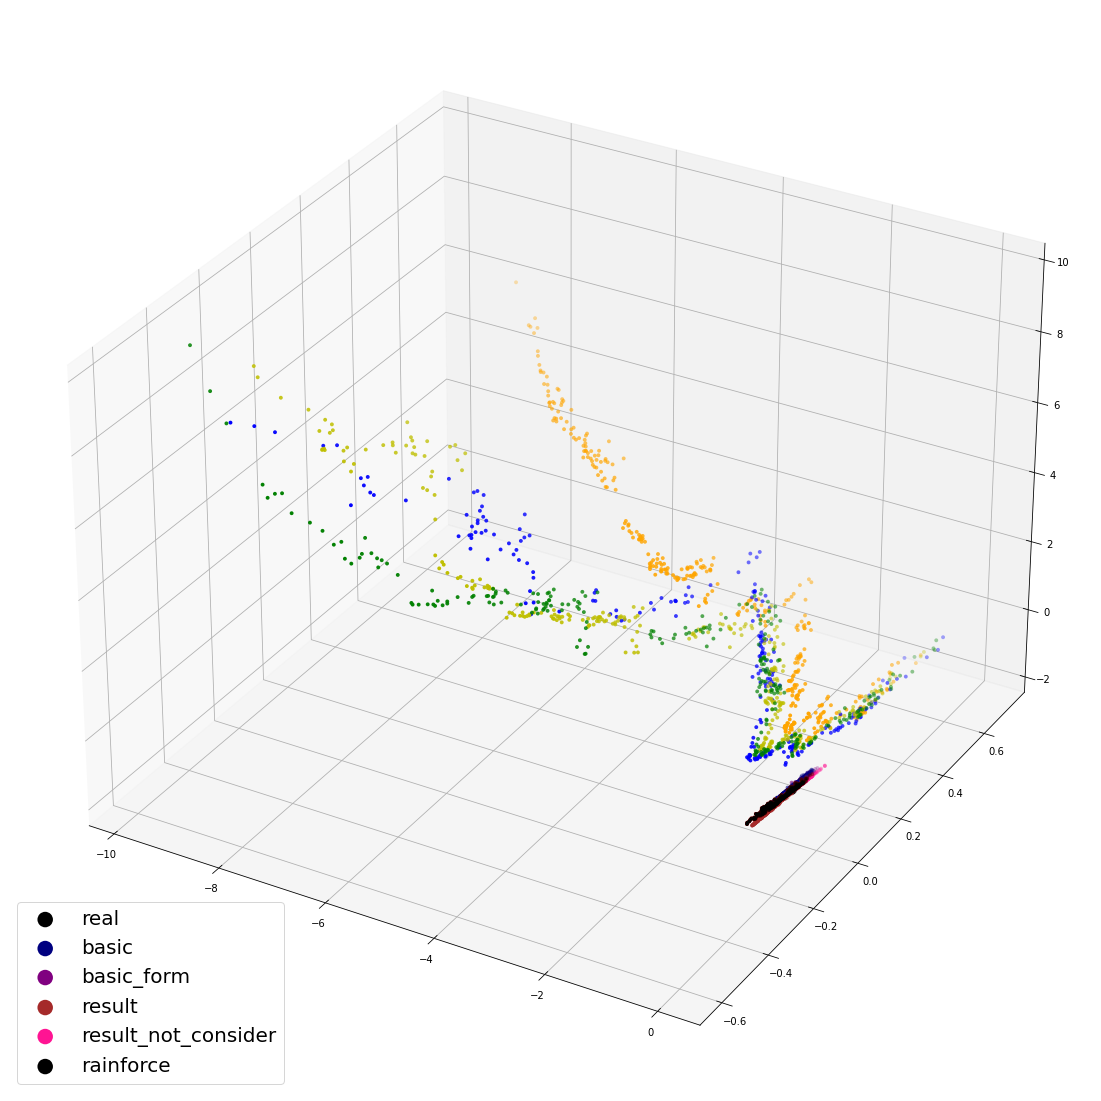

In [54]:
from matplotlib import animation

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.scatter(hundred_enc_out[0], hundred_enc_out[1], hundred_enc_out[2],
                    edgecolor='none', s=15,   c='r')

    ax.scatter(ninety_enc_out[0], ninety_enc_out[1], ninety_enc_out[2],
                    edgecolor='none', s=15,   c='orange')

    ax.scatter(eighty_enc_out[0], eighty_enc_out[1], eighty_enc_out[2],
                    edgecolor='none', s=15,   c='y')

    ax.scatter(seventy_enc_out[0], seventy_enc_out[1], seventy_enc_out[2],
                    edgecolor='none', s=15,   c='g')

    ax.scatter(sixty_enc_out[0], sixty_enc_out[1], sixty_enc_out[2],
                    edgecolor='none', s=15,   c='b')

    ax.scatter(hundred_enc_out[0], hundred_enc_out[1], hundred_enc_out[2],
                    edgecolor='none', s=15, c='k', label='real')

    ax.scatter(basic_enc_out[0], basic_enc_out[1], basic_enc_out[2],
                    edgecolor='none', s=15, c='navy', label='basic')

    ax.scatter(basic_form_enc_out[0], basic_form_enc_out[1], basic_form_enc_out[2],
                    edgecolor='none', s=15, c='purple', label='basic_form')

    ax.scatter(result_enc_out[0], result_enc_out[1], result_enc_out[2],
                    edgecolor='none', s=15, c='brown', label='result')

    ax.scatter(result_not_consider_enc_out[0], result_not_consider_enc_out[1], result_not_consider_enc_out[2],
                    edgecolor='none', s=15, c='deeppink', label='result_not_consider')

    ax.scatter(reinforce_enc_out[0], reinforce_enc_out[1], reinforce_enc_out[2],
                    edgecolor='none', s=15, c='black', label='rainforce')

    plt.legend(loc="lower left", markerscale=4., scatterpoints=1, fontsize=20)

    return fig, 

def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


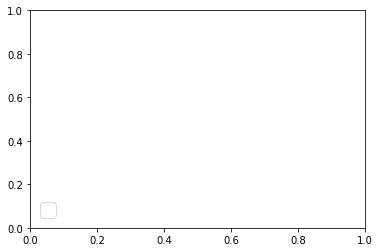

In [55]:
anim.save('using_all.gif', writer='pillow', fps=30)

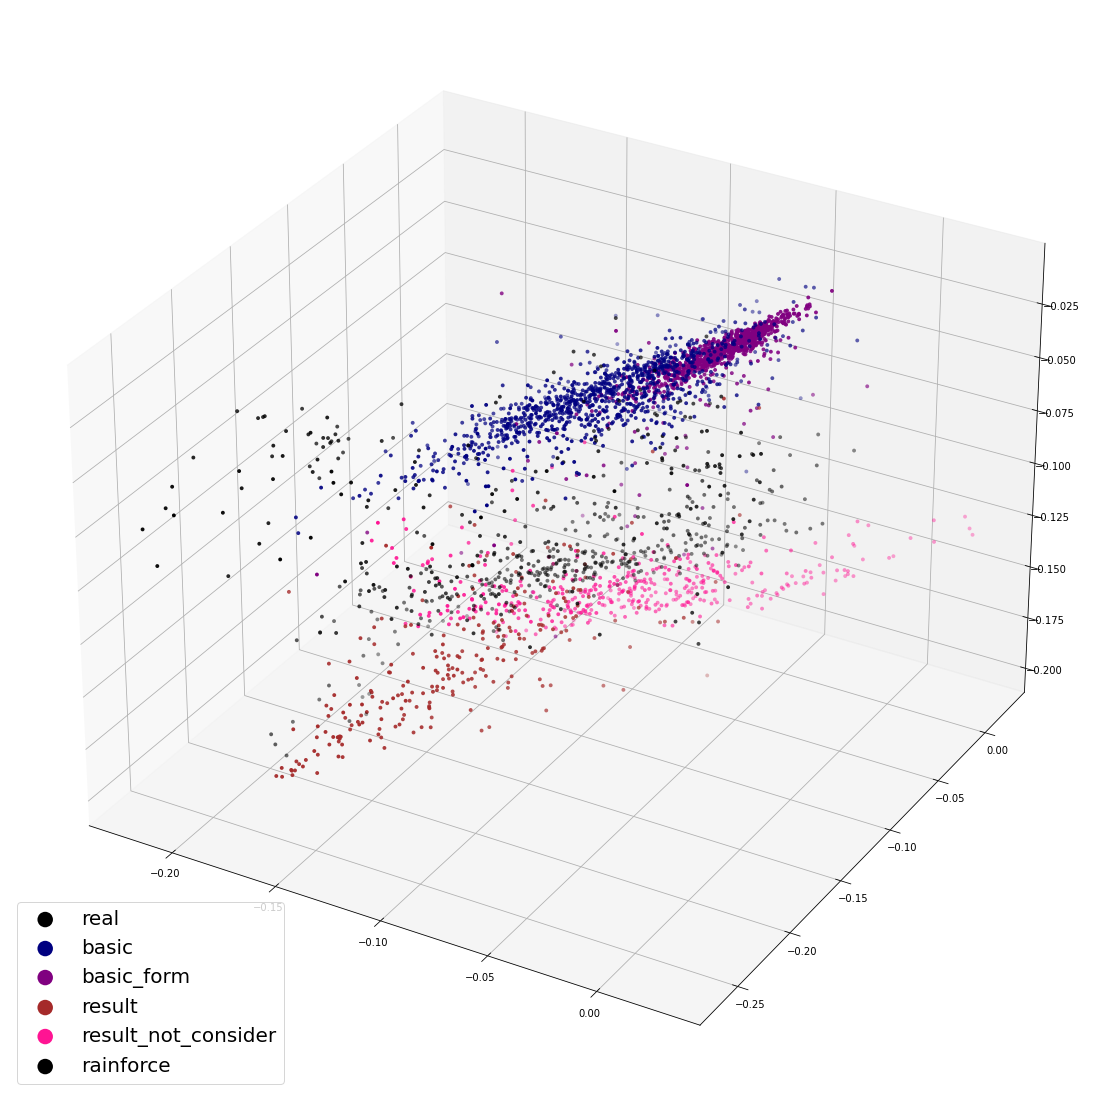

In [52]:
from matplotlib import animation

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.scatter(hundred_enc_out[0], hundred_enc_out[1], hundred_enc_out[2],
                    edgecolor='none', s=15, c='k', label='real')

    ax.scatter(basic_enc_out[0], basic_enc_out[1], basic_enc_out[2],
                    edgecolor='none', s=15, c='navy', label='basic')

    ax.scatter(basic_form_enc_out[0], basic_form_enc_out[1], basic_form_enc_out[2],
                    edgecolor='none', s=15, c='purple', label='basic_form')

    ax.scatter(result_enc_out[0], result_enc_out[1], result_enc_out[2],
                    edgecolor='none', s=15, c='brown', label='result')

    ax.scatter(result_not_consider_enc_out[0], result_not_consider_enc_out[1], result_not_consider_enc_out[2],
                    edgecolor='none', s=15, c='deeppink', label='result_not_consider')

    ax.scatter(reinforce_enc_out[0], reinforce_enc_out[1], reinforce_enc_out[2],
                    edgecolor='none', s=15, c='black', label='rainforce')

    plt.legend(loc="lower left", markerscale=4., scatterpoints=1, fontsize=20)
    
    return fig, 

def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

# Animate
anim_t = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


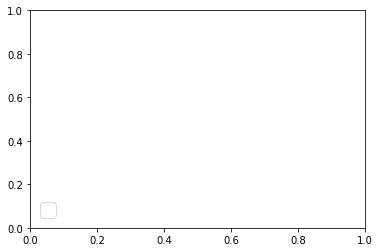

In [53]:
anim_t.save('using_5_result.gif', writer='pillow', fps=30)

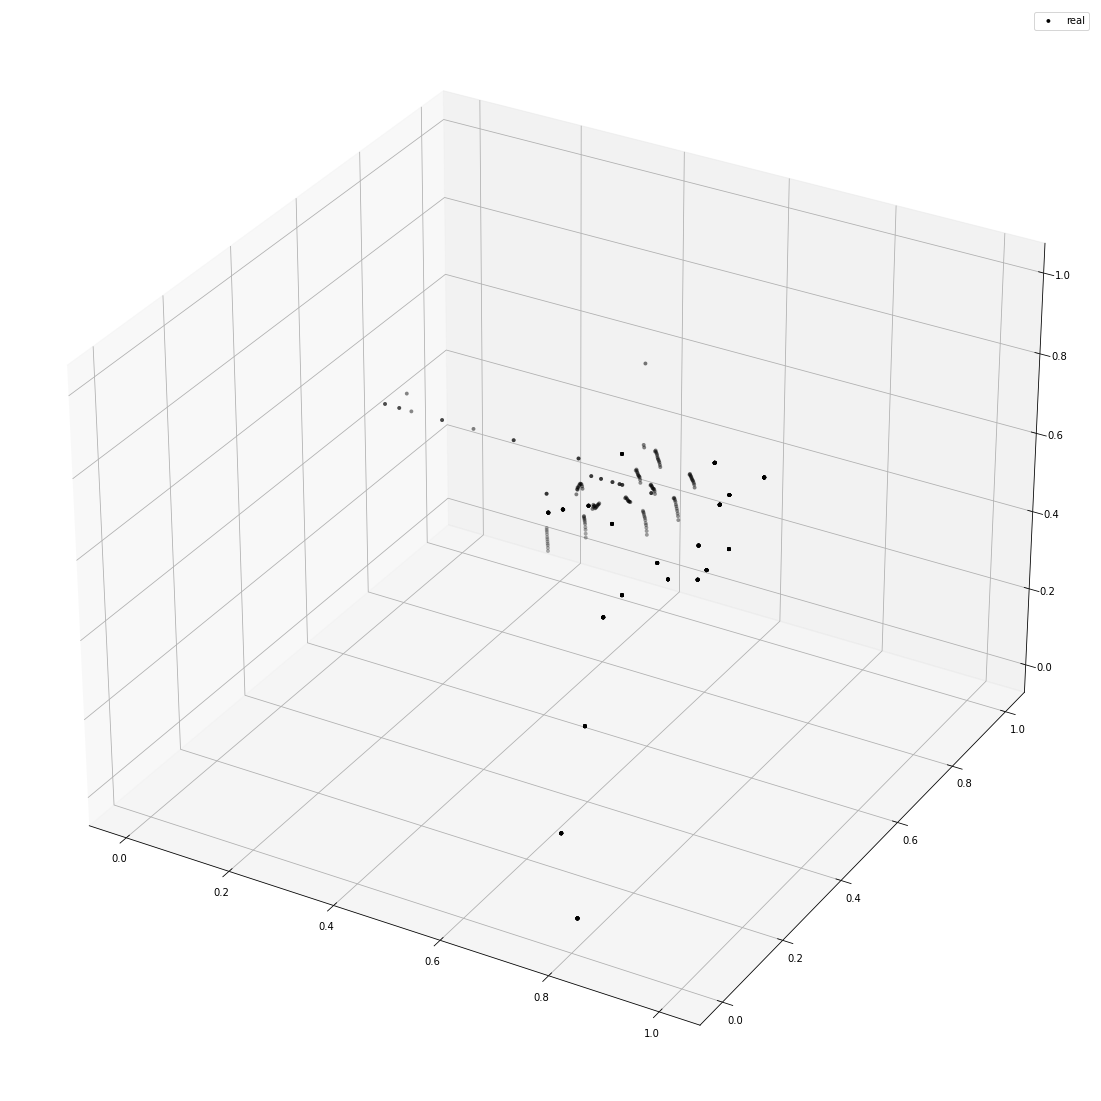

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(hundred_enc_out[0], hundred_enc_out[1], hundred_enc_out[2],
                    edgecolor='none', s=15, c='k', label='real')
plt.legend()

plt.show()